<a href="https://colab.research.google.com/github/alyilmaz99/ml_school_dropout_prediction/blob/main/student_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_predict
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import imblearn
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('/content/data.csv', delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
mapping = {"Dropout": 0, "Graduate": 1, "Enrolled": 2}

data['Target'] = data['Target'].map(mapping)

data.head(10)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


In [ ]:
def smote_data(X, y):
    smotenc = SMOTENC(random_state = 123, categorical_features = list(range(8, 36)), n_jobs=-1)
    X_smote, y_smote = smotenc.fit_resample(X, y)
    return X_smote, y_smote

X = data.drop('Target', axis=1)
y = data['Target']

X_smote, y_smote = smote_data(X, y)

In [ ]:
X.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:

correlation = X_smote.corrwith(y_smote).abs().sort_values(ascending=False)

threshold = 0.3

selected_features = correlation[correlation > threshold].index.tolist()

print("Selected Features:")
print(selected_features)

df_selected_features = X_smote[selected_features].copy()
df_selected_features['Target'] = y_smote

X_fs = df_selected_features.drop('Target', axis=1)
y_fs = df_selected_features['Target']

Selected Features:
['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Tuition fees up to date', 'Curricular units 1st sem (approved)']


In [ ]:
data[selected_features]

,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (approved)
0,0.000000,0.000000,0,1,0
1,13.666667,14.000000,6,0,6
2,0.000000,0.000000,0,0,0
3,12.400000,13.428571,5,1,6
4,13.000000,12.333333,6,1,5
...,...,...,...,...,...
4419,12.666667,13.600000,5,1,5
4420,11.000000,12.000000,2,0,6
4421,13.500000,14.912500,1,1,7
4422,12.000000,13.800000,5,1,5


In [ ]:
def precision_score_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    return precision

def recall_score_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    return recall

def accuracy_score_manual(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    accuracy = correct / len(y_true)
    return accuracy

def f1_score_manual(y_true, y_pred):
    precision = precision_score_manual(y_true, y_pred)
    recall = recall_score_manual(y_true, y_pred)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1


In [ ]:
def cross_validate(X, y, model, scoring='recall', num_folds=10):
    num_instances = len(X)
    fold_size = num_instances // num_folds

    indices = np.arange(num_instances)
    np.random.seed(123)
    np.random.shuffle(indices)

    X_train_shuffled = X.iloc[indices]
    y_train_shuffled = y.iloc[indices]

    best_model = None
    scores = []
    predictions = []
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    f1_scores = []

    for i in range(num_folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i < num_folds - 1 else num_instances

        X_fold = X_train_shuffled.iloc[start:end]
        y_fold = y_train_shuffled.iloc[start:end]

        X_train_fold = pd.concat([X_fold, X_train_shuffled.iloc[:start], X_train_shuffled.iloc[end:]], axis=0)
        y_train_fold = pd.concat([y_fold, y_train_shuffled.iloc[:start], y_train_shuffled.iloc[end:]], axis=0)

        model.fit(X_train_fold, y_train_fold)

        X_test_fold = X_train_shuffled.iloc[start:end]
        y_test_fold = y_train_shuffled.iloc[start:end]

        prediction = model.predict(X_test_fold)
        predictions.append(prediction)

        score = model.score(X_test_fold, y_test_fold)
        scores.append(score)

        precision = precision_score_manual(y_test_fold, prediction)
        precision_scores.append(precision)
        recall = recall_score_manual(y_test_fold, prediction)
        recall_scores.append(recall)

        accuracy = accuracy_score_manual(y_test_fold, prediction)
        accuracy_scores.append(accuracy)

        f1 = f1_score_manual(y_test_fold, prediction)
        f1_scores.append(f1)


    performance_values = {
       'Accuracy': np.mean(accuracy_scores),
        'Precision': np.mean(precision_scores),
        'Recall':  np.mean(recall_scores),
        'F1': np.mean(f1_scores)
    }


    print("Best Accuracy Score:", np.max(scores))
    print("Accuracy Scores:", accuracy_scores)
    print("Average Accuracy Score:", np.mean(accuracy_scores))
    print("Average Precision Score:", np.mean(precision_scores))
    print("Average Recall Score:", np.mean(recall_scores))
    print("Average F1 Score:", np.mean(f1_scores))

    return performance_values


In [ ]:
model_metrics =  {}
models = {
    "LSVM": LinearSVC(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "RBF SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(),
    #"XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=5000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}
for model_name, model in models.items():
    print(f"model: {model_name}, cross-validation result:")
    performance_values = cross_validate(X_smote, y_smote, model)
    print("\n----------------------------------------------------------------------------\n")
    model_metrics[model_name] = performance_values

LSVM modeli için cross-validation sonuçları:
Best Accuracy Skoru: 0.620845921450151
Accuracy Scores: [0.5045317220543807, 0.620845921450151, 0.5045317220543807, 0.47583081570996977, 0.3564954682779456, 0.41389728096676737, 0.5030211480362538, 0.5302114803625377, 0.5800604229607251, 0.5485799701046338]
Average Accuracy Score: 0.5038005951977745
Average Precision Score: 0.8356337631971306
Average Recall Score: 0.70373620491011
Average F1 Score: 0.6905049318883946

----------------------------------------------------------------------------

KNN modeli için cross-validation sonuçları:
Best Accuracy Skoru: 0.8006042296072508
Accuracy Scores: [0.7779456193353474, 0.7628398791540786, 0.783987915407855, 0.7960725075528701, 0.7809667673716012, 0.7885196374622356, 0.8006042296072508, 0.7870090634441088, 0.7764350453172205, 0.7713004484304933]
Average Accuracy Score: 0.7825681113083061
Average Precision Score: 0.8681951099050694
Average Recall Score: 0.8996682284875368
Average F1 Score: 0.883337

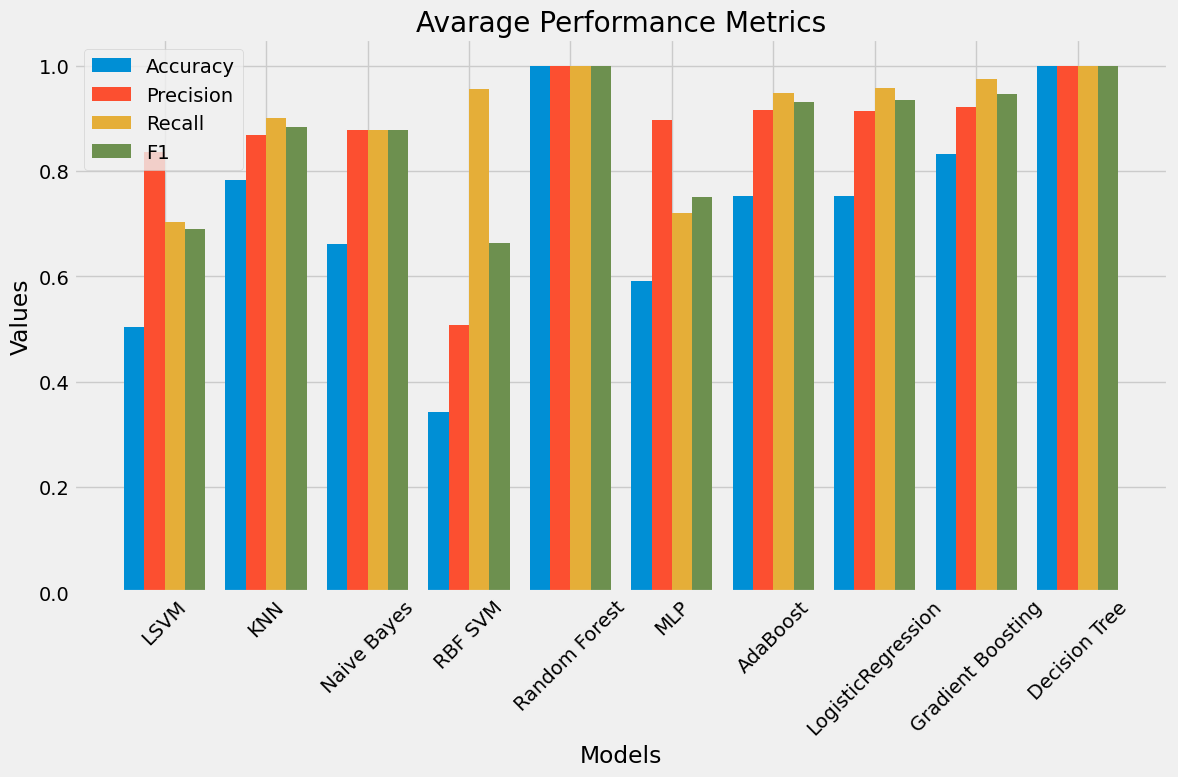

In [ ]:
plt.figure(figsize=(12, 8))
bar_width = 0.2

x = np.arange(len(model_metrics))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    values = [model_metrics[model][metric] for model in model_metrics]
    plt.bar(x + i * bar_width, values, bar_width, label=metric)

plt.xticks(x + bar_width * (len(metrics) - 1) / 2, model_metrics.keys(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Avarage Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df_selected_features.head()

,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (approved),Target
0,0.000000,0.000000,0,1,0,0
1,13.666667,14.000000,6,0,6,1
2,0.000000,0.000000,0,0,0,0
3,12.400000,13.428571,5,1,6,1
4,13.000000,12.333333,6,1,5,1


In [ ]:
model_metrics2 = {}
X_fs = df_selected_features.drop('Target', axis=1)
y_fs = df_selected_features['Target']


In [ ]:
X_fs.head()

,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Tuition fees up to date,Curricular units 1st sem (approved)
0,0.000000,0.000000,0,1,0
1,13.666667,14.000000,6,0,6
2,0.000000,0.000000,0,0,0
3,12.400000,13.428571,5,1,6
4,13.000000,12.333333,6,1,5


In [ ]:
for model_name, model in models.items():
    print(f"model: {model_name}, cross-validation result:")
    performance_values = cross_validate(X_fs, y_fs, model)
    print("\n----------------------------------------------------------------------------\n")
    model_metrics2[model_name] = performance_values

model: LSVM, cross-validation result:
Best Accuracy Skoru: 0.7069486404833837
Accuracy Scores: [0.6722054380664653, 0.6737160120845922, 0.6797583081570997, 0.6933534743202417, 0.7069486404833837, 0.6737160120845922, 0.6691842900302115, 0.6888217522658611, 0.6933534743202417, 0.695067264573991]
Average Accuracy Score: 0.684612466638668
Average Precision Score: 0.8864637217584763
Average Recall Score: 0.9489988449841513
Average F1 Score: 0.9165491702165838

----------------------------------------------------------------------------

model: KNN, cross-validation result:
Best Accuracy Skoru: 0.8051359516616314
Accuracy Scores: [0.7673716012084593, 0.756797583081571, 0.7809667673716012, 0.7824773413897281, 0.7930513595166163, 0.7854984894259819, 0.8051359516616314, 0.7583081570996979, 0.7719033232628398, 0.7877428998505231]
Average Accuracy Score: 0.7789253473868649
Average Precision Score: 0.9142666279618339
Average Recall Score: 0.924312856993984
Average F1 Score: 0.9191191962612184

---

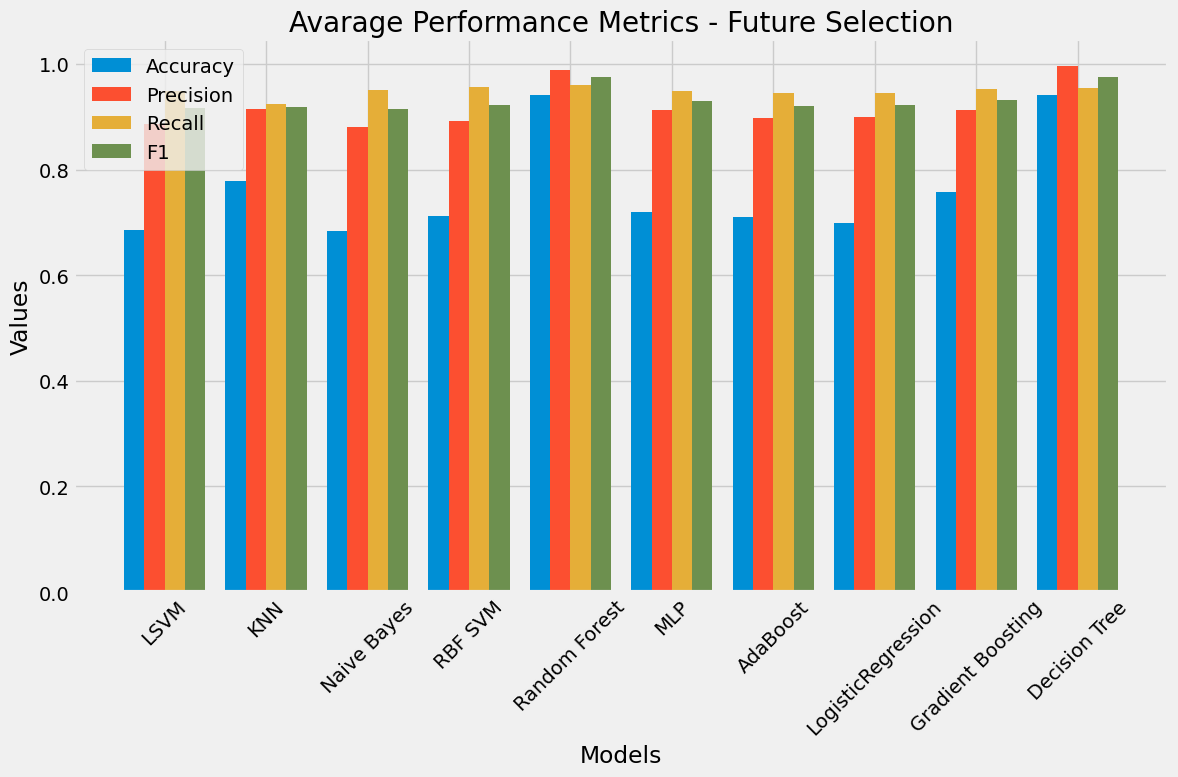

In [ ]:
plt.figure(figsize=(12, 8))
bar_width = 0.2

x = np.arange(len(model_metrics2))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

for i, metric in enumerate(metrics):
    values = [model_metrics2[model][metric] for model in model_metrics2]
    plt.bar(x + i * bar_width, values, bar_width, label=metric)

plt.xticks(x + bar_width * (len(metrics) - 1) / 2, model_metrics2.keys(), rotation=45)
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Avarage Performance Metrics - Future Selection')
plt.legend()
plt.tight_layout()
plt.show()